In [1]:
import os

os.getcwd()

'/home/yotamfr/development/prot2vec/src/python'

In [2]:
from src.python.digo2 import *

asp = 'F'
year = 2014

/home/yotamfr/development/prot2vec/virtualenv/lib/python3.6/site-packages/Bio/SearchIO/__init__.py:211: BiopythonExperimentalWarning: Bio.SearchIO is an experimental submodule which may undergo significant changes prior to its future official release.
  BiopythonExperimentalWarning)


In [3]:
%matplotlib inline
%load_ext autoreload   
%autoreload 2

import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

def plot_histograms(pos, neg, val_range, pos_label='same-leaf', neg_label='cousins'):
    plt.hist(pos, bins=100, alpha=0.8, label=pos_label, normed=1, cumulative=True, histtype='step', range=val_range)
    plt.hist(neg, bins=100, alpha=0.8, label=neg_label, normed=1, cumulative=True, histtype='step', range=val_range)
    plt.legend(loc='upper right')
    plt.title("Distribution of  CosineSimilarity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

In [4]:
pos = [p[0] for p in load_object("../../Data/dingo_%s_ks_pos_data" % (GoAspect(asp),))]
neg = [n[0] for n in load_object("../../Data/dingo_%s_ks_neg_data" % (GoAspect(asp),))]
len(pos), len(neg), np.mean(pos), np.mean(neg)

(10000, 10000, 0.95146024, 0.60970664)

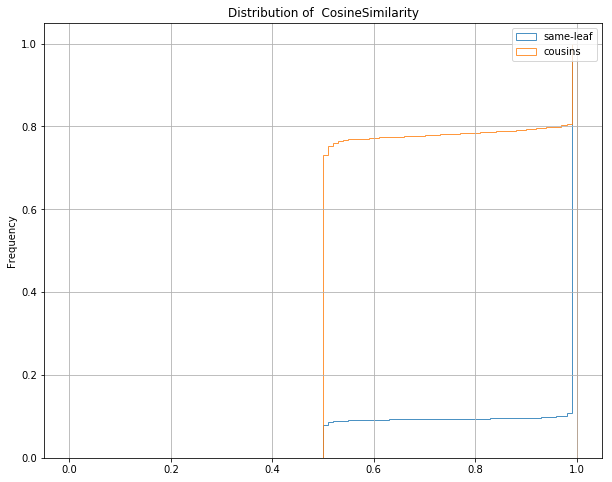

In [5]:
plot_histograms(pos, neg, (0, 1))

In [6]:
ks_2samp(pos, neg)

Ks_2sampResult(statistic=0.70179999999999998, pvalue=0.0)

In [7]:
graph = load_object("../../Data/dingo_%s_graph_%d" % (GoAspect(asp), year))
for node in graph: compute_node_prior(node, graph, grace=0.0)

In [8]:
preds_per_uid_blast = load_object("../../Data/blast_%s_preds_%d" % (GoAspect(asp), year))
preds_per_uid_dingo = load_object("../../Data/dingo_%s_preds_%d" % (GoAspect(asp), year))

# hits_per_uid = load_object("../../Data/blast_%s_hsp_%d" % (GoAspect(asp), year))
gt_per_uid = load_object("../../Data/gt_%s_%d" % (GoAspect(asp), year))
len(preds_per_uid_blast), len(gt_per_uid), len(preds_per_uid_dingo)

(2893, 2893, 2893)

In [9]:
import pandas as pd
from baselines import *

thresholds = [0, 10e-3, 0.01, 0.02, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.80, 0.85, 0.90, 0.95, 0.99]
perf_dingo = ths, prs, rcs, f1s = performance(preds_per_uid_dingo, gt_per_uid, ths=thresholds)
pd.DataFrame({"Threshold":ths, "Precision":prs, "Recall":rcs, "F1":f1s}).head(30)

,F1,Precision,Recall,Threshold
0,0.494912,0.426170,0.590096,0.00
1,0.460348,0.570061,0.386050,0.01
2,0.460348,0.570061,0.386050,0.01
3,0.449935,0.591622,0.363001,0.02
4,0.439276,0.607707,0.343948,0.05
5,0.427923,0.635309,0.322612,0.10
6,0.422076,0.651704,0.312105,0.15
7,0.400399,0.679604,0.283803,0.20
8,0.388868,0.691322,0.270517,0.25
9,0.378867,0.701798,0.259472,0.30


In [10]:
import pandas as pd
from baselines import *

thresholds = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
perf_pident = ths, prs, rcs, f1s = performance(preds_per_uid_blast, gt_per_uid, ths=thresholds)
pd.DataFrame({"Threshold":ths, "Precision":prs, "Recall":rcs, "F1":f1s}).head(20)

,F1,Precision,Recall,Threshold
0,0.487856,0.362015,0.747800,15
1,0.487981,0.362214,0.747541,20
2,0.504251,0.383846,0.734721,25
3,0.541162,0.449062,0.680787,30
4,0.567542,0.531898,0.608305,35
5,0.571275,0.616228,0.532434,40
6,0.554917,0.689461,0.464310,45
7,0.514076,0.742497,0.393133,50
8,0.460299,0.788760,0.324972,55
9,0.418692,0.819037,0.281228,60


In [11]:
import pandas as pd
from baselines import *

preds_per_uid_dingo_blast = {}
for uid in preds_per_uid_blast.keys():
    preds_per_uid_dingo_blast[uid] = {}
    for go, percent in preds_per_uid_blast[uid].items():
        if go not in preds_per_uid_dingo[uid]:
            preds_per_uid_dingo_blast[uid][go] = percent/100
        else:
            preds_per_uid_dingo_blast[uid][go] = preds_per_uid_dingo[uid][go]

thresholds = [0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95]
perf_combined = ths, prs, rcs, f1s = performance(preds_per_uid_dingo_blast, gt_per_uid, ths=thresholds)
pd.DataFrame({"Threshold":ths, "Precision":prs, "Recall":rcs, "F1":f1s}).head(20)

,F1,Precision,Recall,Threshold
0,0.423775,0.385491,0.470501,0.15
1,0.410794,0.383749,0.441939,0.20
2,0.414294,0.404576,0.424491,0.25
3,0.423564,0.452618,0.398016,0.30
4,0.422687,0.507269,0.362281,0.35
5,0.419023,0.552955,0.337320,0.40
6,0.411253,0.601722,0.312374,0.45
7,0.396787,0.637925,0.287944,0.50
8,0.378404,0.672754,0.263232,0.55
9,0.361574,0.692894,0.244609,0.60


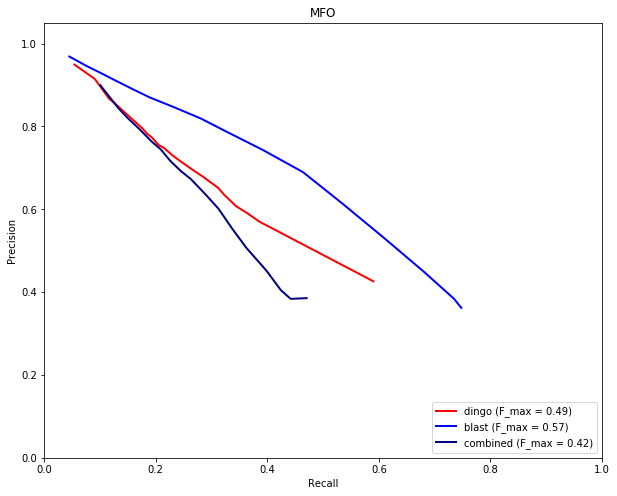

In [12]:
plot_precision_recall({"dingo": perf_dingo, "blast": perf_pident, "combined": perf_combined})